# DQL 数据查询语言
---

<font size=3>**本课内容：**</font>

1. 获取数据 SELECT
2. 单表和多表查询 FROM
3. 条件限制 WHERE
4. 分组 GROUP BY
5. 分组过滤 HAVING
6. 排序 ORDER BY
7. 限制结果数量 LIMIT
---

数据查询基本 SQL 语法：

    SELECT
    FROM（可选）
    WHERE（可选）
    GROUP BY（可选）
    HAVING（可选）
    ORDER BY（可选）
    LIMIT（可选）

## 1. 获取数据 SELECT

SQLite 的 SELECT 语句用于从 SQLite 数据库表中获取数据，以结果表的形式返回数据，这些结果表也被称为结果集。

SQLite 的 SELECT 语句的基本语法如下：

    SELECT column1, column2, columnN FROM table_name;
    
其中 column1, column2...是表的字段，他们的值即是您要获取的。如果您想获取所有可用的字段，那么可以使用下面的语法：

    SELECT * FROM table_name;

### 1.1. 常用聚合函数

#### 1.1.1. COUNT 函数

SQLite COUNT 聚合函数是用来计算一个数据库表中的行数。

In [1]:
# 导入模块
import sqlite3
import pandas as pd

# 创建数据库 Northwind 连接
conn = sqlite3.connect('Northwind_small.sqlite')
# 创建光标
cur = conn.cursor()

In [2]:
# 计算 Category 表中有多少行数据
cur.execute("SELECT COUNT(*) FROM Category")
cur.fetchall()

[(8,)]

#### 1.1.2. MAX 函数

SQLite MAX 聚合函数允许我们选择某列的最大值。

In [3]:
# 选出单价最高的产品
cur.execute("SELECT Id, ProductName, MAX(UnitPrice) FROM Product")
cur.fetchall()

[(38, 'Côte de Blaye', 263.5)]

#### 1.1.3. MIN 函数

SQLite MIN 聚合函数允许我们选择某列的最小值。

In [4]:
# 选出单价最低的产品
cur.execute("SELECT Id, ProductName, MIN(UnitPrice) FROM Product")
cur.fetchall()

[(33, 'Geitost', 2.5)]

#### 1.1.4. AVG 函数

SQLite AVG 聚合函数计算某列的平均值。

In [5]:
# 计算所有产品平均单价
cur.execute("SELECT AVG(UnitPrice) FROM Product")
cur.fetchall()

[(28.866363636363637,)]

#### 1.1.5. SUM 函数

SQLite SUM 聚合函数允许为一个数值列计算总和。

In [6]:
# 计算所有订单的产品总数
cur.execute("SELECT SUM(Quantity) FROM OrderDetail")
cur.fetchall()

[(51317,)]

In [7]:
# 计算所有订单总金额
cur.execute("SELECT SUM(Quantity*UnitPrice) FROM OrderDetail")
for result in cur:
    print(round(result[0],2))

1354458.59


In [8]:
# 计算所有订单总金额(折后)
cur.execute("SELECT SUM(Quantity*UnitPrice*(1-Discount)) FROM OrderDetail")
cur.fetchall()

[(1265793.0395000004,)]

### 1.2. 其他常用函数

#### 1.2.1. ABS 函数

SQLite ABS 函数返回数值参数的绝对值。

In [9]:
cur.execute("SELECT ABS(-5)")          # SELECT 语句可以没有 FROM
cur.fetchone()

(5,)

#### 1.2.2. UPPER 函数

SQLite UPPER 函数把字符串转换为大写字母。

In [10]:
cur.execute("SELECT UPPER(FirstName) FROM Employee")
cur.fetchall()

[('NANCY',),
 ('ANDREW',),
 ('JANET',),
 ('MARGARET',),
 ('STEVEN',),
 ('MICHAEL',),
 ('ROBERT',),
 ('LAURA',),
 ('ANNE',)]

#### 1.2.3. LOWER 函数

SQLite LOWER 函数把字符串转换为小写字母。

In [11]:
cur.execute("SELECT LOWER(LastName) FROM Employee")
cur.fetchall()

[('davolio',),
 ('fuller',),
 ('leverling',),
 ('peacock',),
 ('buchanan',),
 ('suyama',),
 ('king',),
 ('callahan',),
 ('dodsworth',)]

#### 1.2.4. LENGTH 函数

SQLite LENGTH 函数返回字符串的长度。

In [12]:
cur.execute("SELECT LENGTH(FirstName) FROM Employee")
cur.fetchall()

[(5,), (6,), (5,), (8,), (6,), (7,), (6,), (5,), (4,)]

### 1.3. DISTINCT 关键字

SQLite 的 DISTINCT 关键字与 SELECT 语句一起使用，来消除所有重复的记录，并只获取唯一一次记录。

In [13]:
# 所有产品分类名称（不重复）
cur.execute("SELECT DISTINCT CategoryName FROM ProductDetails_V")
cur.fetchall()

[('Beverages',),
 ('Condiments',),
 ('Produce',),
 ('Meat/Poultry',),
 ('Seafood',),
 ('Dairy Products',),
 ('Confections',),
 ('Grains/Cereals',)]

In [14]:
# 和 Category 表进行对比
cur.execute("SELECT CategoryName FROM Category")
cur.fetchall()

[('Beverages',),
 ('Condiments',),
 ('Confections',),
 ('Dairy Products',),
 ('Grains/Cereals',),
 ('Meat/Poultry',),
 ('Produce',),
 ('Seafood',)]

## 2. 单表和多表查询 FROM

SQLite 的 JOIN 子句用于结合两个或多个数据库中表的记录。JOIN 是一种通过共同值来结合两个表中字段的手段。

SQL 定义了三种主要类型的连接：

- 交叉连接 - CROSS JOIN

- 内连接 - INNER JOIN

- 外连接 - OUTER JOIN

### 2.1. 交叉连接 CROSS JOIN

交叉连接把第一个表的每一行与第二个表的每一行进行匹配，即返回被连接的两个表所有数据行的笛卡尔积。

交叉连接的结果，行数是两个表之积，列数是两个表之和。

由于交叉连接有可能产生非常大的表，使用时必须谨慎，只在适当的时候使用它们。

下面是交叉连接的语法：

SELECT ... FROM table1 CROSS JOIN table2 ...

In [15]:
# 交叉连接的结果为两个表中所有数据行的笛卡尔积，不需要内在逻辑关系
sql = """
SELECT CategoryName, CompanyName
FROM Category
    CROSS JOIN Shipper
"""
pd.read_sql(sql, con=conn)

,CategoryName,CompanyName
0,Beverages,Speedy Express
1,Beverages,United Package
2,Beverages,Federal Shipping
3,Condiments,Speedy Express
4,Condiments,United Package
5,Condiments,Federal Shipping
6,Confections,Speedy Express
7,Confections,United Package
8,Confections,Federal Shipping
9,Dairy Products,Speedy Express


### 2.2. 内连接 INNER JOIN

内连接（INNER JOIN）根据连接谓词结合两个表（table1 和 table2）的列值来创建一个新的结果表。查询会把 table1 中的每一行与 table2 中的每一行进行比较，找到所有满足连接谓词的行的匹配对。当满足连接谓词时，A 和 B 行的每个匹配对的列值会合并成一个结果行。

**内连接（INNER JOIN）是最常见的连接类型，是默认的连接类型。INNER 关键字是可选的。**

下面是内连接（INNER JOIN）的语法：

    SELECT ... 
    FROM table1
        [INNER] JOIN table2 
        ON [condition]
    
为了避免冗余，并保持较短的措辞，可以使用 USING 表达式声明内连接（INNER JOIN）条件。这个表达式指定一个或多个列的列表：

    SELECT ... 
    FROM table1 
        JOIN table2
        USING (column1 ,... )

In [16]:
# 查询所有产品对应的类别名称
sql = """
SELECT ProductName, CategoryName
FROM Product AS p
    JOIN Category AS c
    ON p.CategoryId = c.Id
"""
pd.read_sql(sql, con=conn)

,ProductName,CategoryName
0,Chai,Beverages
1,Chang,Beverages
2,Aniseed Syrup,Condiments
3,Chef Anton's Cajun Seasoning,Condiments
4,Chef Anton's Gumbo Mix,Condiments
...,...,...
72,Röd Kaviar,Seafood
73,Longlife Tofu,Produce
74,Rhönbräu Klosterbier,Beverages
75,Lakkalikööri,Beverages


In [17]:
sql = """
SELECT e.FirstName, e.LastName
FROM Employee AS e
    JOIN Employee AS boss
    ON e.ReportsTo = boss.Id
WHERE boss.Title="Sales Manager"
"""
pd.read_sql(sql, con=conn)

,FirstName,LastName
0,Michael,Suyama
1,Robert,King
2,Anne,Dodsworth


### 2.3. 外连接 OUTER JOIN

外连接（OUTER JOIN）是内连接（INNER JOIN）的扩展，外连接（OUTER JOIN）将从一个或两个表中任何未连接的行合并进来，外连接的列使用 NULL 值，将它们附加到结果表中。

虽然 SQL 标准定义了三种类型的外连接：LEFT、RIGHT、FULL，但 SQLite 只支持 左外连接（LEFT OUTER JOIN）。


下面是左外连接（LEFT OUTER JOIN）的语法：

    SELECT ... 
    FROM table1 
        LEFT OUTER JOIN table2 
        ON [condition]

为了避免冗余，并保持较短的措辞，可以使用 USING 表达式声明外连接（OUTER JOIN）条件。这个表达式指定一个或多个列的列表：

    SELECT ... 
    FROM table1 
        LEFT OUTER JOIN table2 
        USING (column1 ,... )

In [18]:
conn = sqlite3.connect('new_database.sqlite')

df1 = pd.DataFrame({'code':['300153','000861','002083'],
                    'pe':[115,39,13]})
df2 = pd.DataFrame({'code':['300153','000861','002083','300658'],
                    'pb':[2.21,1.53,1.62,2.89]})
print(df1)
print(df2)

     code   pe
0  300153  115
1  000861   39
2  002083   13
     code    pb
0  300153  2.21
1  000861  1.53
2  002083  1.62
3  300658  2.89


In [19]:
# 将 DataFrame 写入数据库
pd.io.sql.to_sql(df1, 'PE', con=conn, if_exists='replace', index=False)
pd.io.sql.to_sql(df2, 'PB', con=conn, if_exists='replace', index=False)

In [20]:
help(pd.io.sql.to_sql)

Help on function to_sql in module pandas.io.sql:

to_sql(frame, name, con, schema=None, if_exists='fail', index=True, index_label=None, chunksize=None, dtype=None, method=None) -> None
    Write records stored in a DataFrame to a SQL database.
    
    Parameters
    ----------
    frame : DataFrame, Series
    name : str
        Name of SQL table.
    con : SQLAlchemy connectable(engine/connection) or database string URI
        or sqlite3 DBAPI2 connection
        Using SQLAlchemy makes it possible to use any DB supported by that
        library.
        If a DBAPI2 object, only sqlite3 is supported.
    schema : str, optional
        Name of SQL schema in database to write to (if database flavor
        supports this). If None, use default schema (default).
    if_exists : {'fail', 'replace', 'append'}, default 'fail'
        - fail: If table exists, do nothing.
        - replace: If table exists, drop it, recreate it, and insert data.
        - append: If table exists, insert data.

In [21]:
sql = """
SELECT code, pe, pb
FROM PE
    LEFT OUTER JOIN PB
    USING (code)
"""
pd.read_sql(sql, con=conn)

,code,pe,pb
0,300153,115,2.21
1,000861,39,1.53
2,002083,13,1.62


In [22]:
sql = """
SELECT code, pe, pb
FROM PB
    LEFT OUTER JOIN PE
    USING (code)
"""
pd.read_sql(sql, con=conn)

,code,pe,pb
0,300153,115.0,2.21
1,000861,39.0,1.53
2,002083,13.0,1.62
3,300658,NaN,2.89


## 3. 条件限制 WHERE

SQLite的 WHERE 子句用于指定从一个表或多个表中获取数据的条件。

如果满足给定的条件，即为真（true）时，则从表中返回特定的值。您可以使用 WHERE 子句来过滤记录，只获取需要的记录。

WHERE 子句不仅可用在 SELECT 语句中，它也可用在 UPDATE、DELETE 语句中，等等。

**语法**

SQLite 的带有 WHERE 子句的 SELECT 语句的基本语法如下：

    SELECT column1, column2, ...
    FROM table_name
    WHERE [condition]

### 3.1. 比较运算符

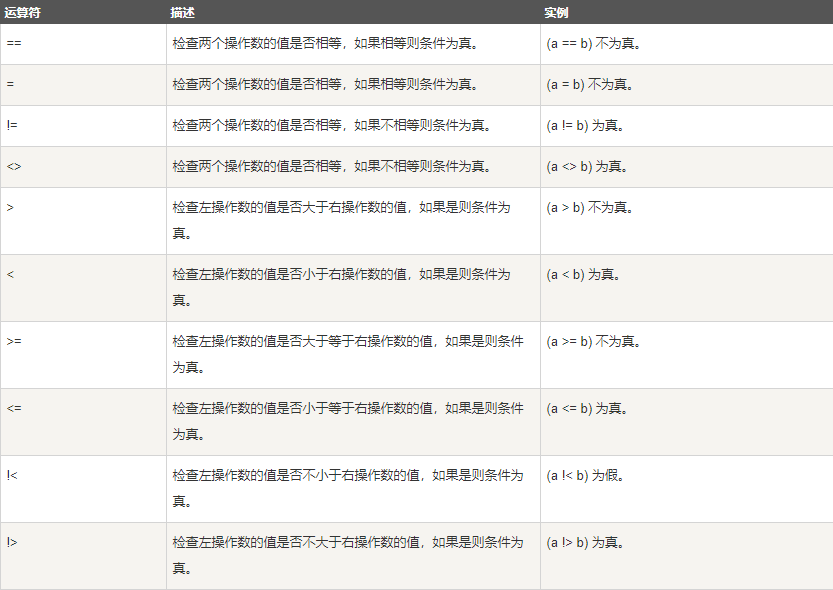

In [24]:
# 查询出所在区域为北美（North America）的客户的公司名称
conn = sqlite3.connect('Northwind_small.sqlite')
sql = """
SELECT CompanyName
FROM Customer
WHERE Region='North America'
"""
pd.read_sql(sql, con=conn)

,CompanyName
0,Bottom-Dollar Markets
1,Great Lakes Food Market
2,Hungry Coyote Import Store
3,Laughing Bacchus Wine Cellars
4,Lazy K Kountry Store
5,Let's Stop N Shop
6,Lonesome Pine Restaurant
7,Mère Paillarde
8,Old World Delicatessen
9,Rattlesnake Canyon Grocery


In [25]:
# 查询出所有存货小于25的产品名称
sql = """
SELECT ProductName,UnitsInStock 
FROM Product 
WHERE UnitsInStock < 25
"""
pd.read_sql(sql, con=conn)

,ProductName,UnitsInStock
0,Chang,17
1,Aniseed Syrup,13
2,Chef Anton's Gumbo Mix,0
3,Uncle Bob's Organic Dried Pears,15
4,Northwoods Cranberry Sauce,6
5,Queso Cabrales,22
6,Konbu,24
7,Alice Mutton,0
8,Sir Rodney's Scones,3
9,Guaraná Fantástica,20


### 3.2. BETWEEN 运算符

BETWEEN 运算符用于在给定最小值和最大值范围内的一系列值中搜索值，包含两端。

In [26]:
# 查询出所有出生于80年代的员工记录
sql = """
SELECT * 
FROM Employee 
WHERE BirthDate BETWEEN '1980-01-01' AND '1989-12-31'
"""
pd.read_sql(sql, con=conn)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


### 3.3. IN 运算符

IN 运算符用于把某个值与一系列指定列表的值进行比较。

In [27]:
# 查询出所在区域为美洲的客户的公司名称
sql = """
SELECT CompanyName, Region
FROM Customer
WHERE Region IN ('North America','South America','Central America')
"""
pd.read_sql(sql, con=conn)

,CompanyName,Region
0,Ana Trujillo Emparedados y helados,Central America
1,Antonio Moreno Taquería,Central America
2,Bottom-Dollar Markets,North America
3,Cactus Comidas para llevar,South America
4,Centro comercial Moctezuma,Central America
5,Comércio Mineiro,South America
6,Familia Arquibaldo,South America
7,Gourmet Lanchonetes,South America
8,Great Lakes Food Market,North America
9,GROSELLA-Restaurante,South America


### 3.4. LIKE 运算符

SQLite 的 LIKE 运算符是用来匹配通配符指定模式的文本值。如果搜索表达式与模式表达式匹配，LIKE 运算符将返回真（true），也就是 1。

这里有两个通配符与 LIKE 运算符一起使用：

- 百分号 （%）：代表零个、一个或多个数字或字符


- 下划线 （_）：代表一个单一的数字或字符

这些符号可以被组合使用。

In [28]:
# 查询出所有以 'America' 结尾的区域名称
sql = """
SELECT DISTINCT Region
FROM Customer
WHERE Region LIKE '%America'
"""
pd.read_sql(sql, con=conn)

,Region
0,Central America
1,North America
2,South America


In [29]:
# 查询出邮编为四位且以 3 开头的供应商
sql = """
SELECT * FROM Supplier
WHERE PostalCode LIKE '3___'
"""
pd.read_sql(sql, con=conn)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None


In [30]:
# 查询出所有 2014 年 4 月运输的订单
sql = """
SELECT * FROM [Order]
WHERE ShippedDate LIKE '2014-04-__'
"""
pd.read_sql(sql, con=conn)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10924,BERGS,3,2014-03-04,2014-04-01,2014-04-08,2,151.52,Berglunds snabbköp,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden
1,10927,LACOR,4,2014-03-05,2014-04-02,2014-04-08,1,19.79,La corne d'abondance,"67, avenue de l'Europe",Versailles,Western Europe,78000,France
2,10951,RICSU,9,2014-03-16,2014-04-27,2014-04-07,2,30.85,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
3,10960,HILAA,3,2014-03-19,2014-04-02,2014-04-08,1,2.08,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,South America,5022,Venezuela
4,10966,CHOPS,4,2014-03-20,2014-04-17,2014-04-08,1,27.19,Chop-suey Chinese,Hauptstr. 31,Bern,Western Europe,3012,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,11041,CHOPS,3,2014-04-22,2014-05-20,2014-04-28,2,48.22,Chop-suey Chinese,Hauptstr. 31,Bern,Western Europe,3012,Switzerland
70,11043,SPECD,5,2014-04-22,2014-05-20,2014-04-29,2,8.80,Spécialités du monde,"25, rue Lauriston",Paris,Western Europe,75016,France
71,11046,WANDK,8,2014-04-23,2014-05-21,2014-04-24,2,71.64,Die Wandernde Kuh,Adenauerallee 900,Stuttgart,Western Europe,70563,Germany
72,11048,BOTTM,7,2014-04-24,2014-05-22,2014-04-30,3,24.12,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada


### 3.5. GLOB 运算符

SQLite 的 GLOB 运算符是用来匹配通配符指定模式的文本值。如果搜索表达式与模式表达式匹配，GLOB 运算符将返回真（true），也就是 1。

**与 LIKE 运算符不同的是，GLOB 是大小写敏感的。**

- 星号 （*）代表零个、一个或多个数字或字符


- 问号 （?）代表一个单一的数字或字符

这些符号可以被组合使用。

In [50]:
# 查询出所有以 'America' 结尾的区域名称
sql = """
SELECT DISTINCT Region
FROM Customer
WHERE Region GLOB '*America'
"""
pd.read_sql(sql, con=conn)

,Region
0,Central America
1,North America
2,South America


In [48]:
# GLOB 区分大小写
sql = """
SELECT DISTINCT Region
FROM Customer
WHERE Region GLOB '*america'
"""
pd.read_sql(sql, con=conn)

,Region


In [49]:
# LIKE 不区分大小写
sql = """
SELECT DISTINCT Region
FROM Customer
WHERE Region LIKE '%america'
"""
pd.read_sql(sql, con=conn)

,Region
0,Central America
1,North America
2,South America


### 3.6. AND/OR/NOT 运算符

In [31]:
# 查询所有运送到欧洲，并且由 Id 为 4 的员工运送的订单
sql = """
SELECT * FROM [Order]
WHERE ShipRegion LIKE '%Europe' AND EmployeeId=4
"""
pd.read_sql(sql, con=conn)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
1,10260,OTTIK,4,2012-07-19,2012-08-16,2012-07-29,1,55.09,Ottilies Käseladen,Mehrheimerstr. 369,Köln,Western Europe,50739,Germany
2,10267,FRANK,4,2012-07-29,2012-08-26,2012-08-06,1,208.58,Frankenversand,Berliner Platz 43,München,Western Europe,80805,Germany
3,10281,ROMEY,4,2012-08-14,2012-08-28,2012-08-21,1,2.94,Romero y tomillo,"Gran Vía, 1",Madrid,Southern Europe,28001,Spain
4,10282,ROMEY,4,2012-08-15,2012-09-12,2012-08-21,1,12.69,Romero y tomillo,"Gran Vía, 1",Madrid,Southern Europe,28001,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,11029,CHOPS,4,2014-04-16,2014-05-14,2014-04-27,1,47.84,Chop-suey Chinese,Hauptstr. 31,Bern,Western Europe,3012,Switzerland
75,11044,WOLZA,4,2014-04-23,2014-05-21,2014-05-01,1,8.72,Wolski Zajazd,ul. Filtrowa 68,Warszawa,Eastern Europe,01-012,Poland
76,11062,REGGC,4,2014-04-30,2014-05-28,None,2,29.93,Reggiani Caseifici,Strada Provinciale 124,Reggio Emilia,Southern Europe,42100,Italy
77,11072,ERNSH,4,2014-05-05,2014-06-02,None,2,258.64,Ernst Handel,Kirchgasse 6,Graz,Western Europe,8010,Austria


## 4. 分组 GROUP BY

SQLite 的 GROUP BY 子句用于与 SELECT 语句一起使用，来对相同的数据进行分组。

在 SELECT 语句中，GROUP BY 子句放在 WHERE 子句之后，放在 ORDER BY 子句之前。

**语法**

下面给出了 GROUP BY 子句的基本语法。GROUP BY 子句必须放在 WHERE 子句中的条件之后，必须放在 ORDER BY 子句之前。

    SELECT column-list
    FROM table_name
    WHERE [ conditions ]
    GROUP BY column1, column2....columnN
    ORDER BY column1, column2....columnN
    
您可以在 GROUP BY 子句中使用多个列。确保您使用的分组列在列清单中。

In [32]:
# 查询所有产品中每个类别对应的产品数量
sql = """
SELECT CategoryId, COUNT(*) AS NumberOfProduct
FROM Product
GROUP BY CategoryId
"""
pd.read_sql(sql, con=conn)

,CategoryId,NumberOfProduct
0,1,12
1,2,12
2,3,13
3,4,10
4,5,7
5,6,6
6,7,5
7,8,12


In [33]:
# 多重分组
# 查询所有产品中每个类别下每个供应商供应的产品数量
sql = """
SELECT CategoryId, SupplierId, COUNT(*) AS NumberOfProduct
FROM Product
GROUP BY CategoryId, SupplierId
"""
pd.read_sql(sql, con=conn)

,CategoryId,SupplierId,NumberOfProduct
0,1,1,2
1,1,7,1
2,1,10,1
3,1,12,1
4,1,16,3
5,1,18,2
6,1,20,1
7,1,23,1
8,2,1,1
9,2,2,4


## 5. 分组过滤 HAVING

HAVING 子句允许指定条件来过滤将出现在最终结果中的分组结果。

WHERE 子句在所选列上设置条件，而 HAVING 子句则在由 GROUP BY 子句创建的分组上设置条件。

在一个查询中，HAVING 子句必须放在 GROUP BY 子句之后，必须放在 ORDER BY 子句之前。下面是包含 HAVING 子句的 SELECT 语句的语法：

    SELECT column1, column2
    FROM table1, table2
    WHERE [ conditions ]
    GROUP BY column1, column2
    HAVING [ conditions ]
    ORDER BY column1, column2

In [38]:
# 查询产品数量大于 10 的产品类别
sql = """
SELECT CategoryId, COUNT(*) AS NumberOfProduct
FROM Product
GROUP BY CategoryId
HAVING NumberOfProduct > 10
"""
pd.read_sql(sql, con=conn)

,CategoryId,NumberOfProduct
0,1,12
1,2,12
2,3,13
3,8,12


## 6. 排序 ORDER BY

SQLite 的 ORDER BY 子句是用来基于一个或多个列按升序或降序顺序排列数据。

**语法**

ORDER BY 子句的基本语法如下：

    SELECT column-list 
    FROM table_name 
    [WHERE condition] 
    [ORDER BY column1, column2, .. columnN] [ASC | DESC];

In [39]:
# 查询产品数量大于 10 的产品类别
sql = """
SELECT CategoryId, COUNT(*) AS NumberOfProduct
FROM Product
GROUP BY CategoryId
HAVING NumberOfProduct > 10
ORDER BY NumberOfProduct DESC
"""
pd.read_sql(sql, con=conn)

,CategoryId,NumberOfProduct
0,3,13
1,8,12
2,2,12
3,1,12


## 7. 限制结果数量 LIMIT

SQLite 的 LIMIT 子句用于限制由 SELECT 语句返回的数据数量。

**语法**

带有 LIMIT 子句的 SELECT 语句的基本语法如下：

    SELECT column1, column2, columnN 
    FROM table_name
    LIMIT [no of rows]
    
在某些情况下，可能需要从一个特定的偏移开始提取记录。LIMIT 子句与 OFFSET 子句一起使用时的语法：

    SELECT column1, column2, columnN 
    FROM table_name
    LIMIT [no of rows] OFFSET [row num]

In [41]:
sql = """
SELECT * FROM Product
"""
pd.read_sql(sql,con=conn)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,0
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0


In [42]:
# LIMIT起到类似 pandas中 .head()的效果
sql = """
SELECT * FROM Product
LIMIT 5
"""
pd.read_sql(sql,con=conn)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [43]:
# OFFSET 可以设定偏移量
sql = """
SELECT * FROM Product
LIMIT 5 OFFSET 3
"""
pd.read_sql(sql,con=conn)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
1,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
2,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
3,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
4,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0


## 8. 子查询

子查询或称为内部查询、嵌套查询，指的是在 SQLite 查询中的 WHERE 子句中嵌入查询语句。

一个 SELECT 语句的查询结果能够作为另一个语句的输入值。

子查询可以与 SELECT、INSERT、UPDATE 和 DELETE 语句一起使用，可伴随着使用运算符如 =、<、>、>=、<=、IN、BETWEEN 等。

**SELECT 语句中的子查询使用**

子查询通常与 SELECT 语句一起使用。基本语法如下：

    SELECT column_name [, column_name ]
    FROM   table1 [, table2 ]
    WHERE  column_name OPERATOR
          (SELECT column_name [, column_name ]
          FROM table1 [, table2 ]
          [WHERE])

In [51]:
# 查找 1号供应商供应的商品类别的描述
sql = """
SELECT * FROM Category
WHERE Id IN (
    SELECT DISTINCT CategoryId
    FROM Product
    WHERE SupplierId=1)
"""
pd.read_sql(sql,con=conn)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."


In [52]:
conn.close()

声明：本资料仅限内部研究和交流使用，切勿外传。